In [1]:
import numpy as np
from EM import EM
import matplotlib.pyplot as plt

In [2]:
# EM Setting
num_past_effects = 3
training_pct = .8
single_effect = False

In [3]:
data = np.load('../Data/inr_preprocessed_data.npz')

In [4]:
em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, 0, train_pct=training_pct, single_effect=single_effect)

In [5]:
%%time
em.run_EM(500)

max iterations: 500 reached
CPU times: user 25min 42s, sys: 52 ms, total: 25min 42s
Wall time: 25min 42s


In [6]:
em.get_MSE()

0.8121897276622073

In [7]:
treatment_types = ['nsaid', 'transfusion_plasma', 'transfusion_platelet', 'anticoagulant', 'aspirin']
for i, treatment in enumerate(treatment_types):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = ['chronic kidney failure', 'sickle cell', 'age']
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))

Coefficient for nsaid: [ 0.00600964  0.00651543 -0.01199475]
Coefficient for transfusion_plasma: [-0.66193686 -0.13195887 -0.04531077]
Coefficient for transfusion_platelet: [-0.37919572 -0.19929601 -0.2266998 ]
Coefficient for anticoagulant: [-0.40140725 -0.64470841 -0.43347218]
Coefficient for aspirin: [-0.11392445 -0.10655846 -0.05950061]
Coefficient for chronic kidney failure: -1.2649978549058194
Coefficient for sickle cell: -1.6586764431097347
Coefficient for age: -0.08547143644971099


In [8]:
random_patients = np.random.randint(0, em.y.shape[0], 0)
for i in random_patients:
    plot(em, i, bin_size=bin_size)

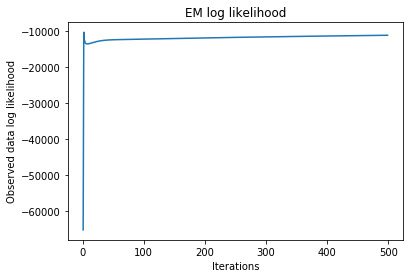

In [11]:
plt.plot([i for i in range(1, len(em.log_lik))], em.log_lik[1:])
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

In [1]:
em.log_lik

NameError: name 'em' is not defined